## Challenger Data Analysis

### Insight

Comparing below the results of the plots and the regression models there is a slight difference pointing to pressure affecting more the probability of malfunctioning flights.

In [21]:
library("dplyr")
library("ggplot2")

In [34]:
data <- read.csv("shuttle.csv")
summary(data)
data

       Date        Count    Temperature       Pressure      Malfunction    
 1/12/86 : 1   Min.   :6   Min.   :53.00   Min.   : 50.0   Min.   :0.0000  
 1/24/85 : 1   1st Qu.:6   1st Qu.:67.00   1st Qu.: 75.0   1st Qu.:0.0000  
 10/03/85: 1   Median :6   Median :70.00   Median :200.0   Median :0.0000  
 10/05/84: 1   Mean   :6   Mean   :69.57   Mean   :152.2   Mean   :0.3913  
 10/30/85: 1   3rd Qu.:6   3rd Qu.:75.00   3rd Qu.:200.0   3rd Qu.:1.0000  
 11/08/84: 1   Max.   :6   Max.   :81.00   Max.   :200.0   Max.   :2.0000  
 (Other) :17                                                               

Date,Count,Temperature,Pressure,Malfunction
<fct>,<int>,<int>,<int>,<int>
4/12/81,6,66,50,0
11/12/81,6,70,50,1
3/22/82,6,69,50,0
11/11/82,6,68,50,0
4/04/83,6,67,50,0
6/18/82,6,72,50,0
8/30/83,6,73,100,0
11/28/83,6,70,100,0
2/03/84,6,57,200,1


In [27]:
malfunctionings <- data %>% filter(Malfunction != 0)
malfunctionings

Date,Count,Temperature,Pressure,Malfunction
<fct>,<int>,<int>,<int>,<int>
11/12/81,6,70,50,1
2/03/84,6,57,200,1
4/06/84,6,63,200,1
8/30/84,6,70,200,1
1/24/85,6,53,200,2
10/30/85,6,75,200,2
1/12/86,6,58,200,1


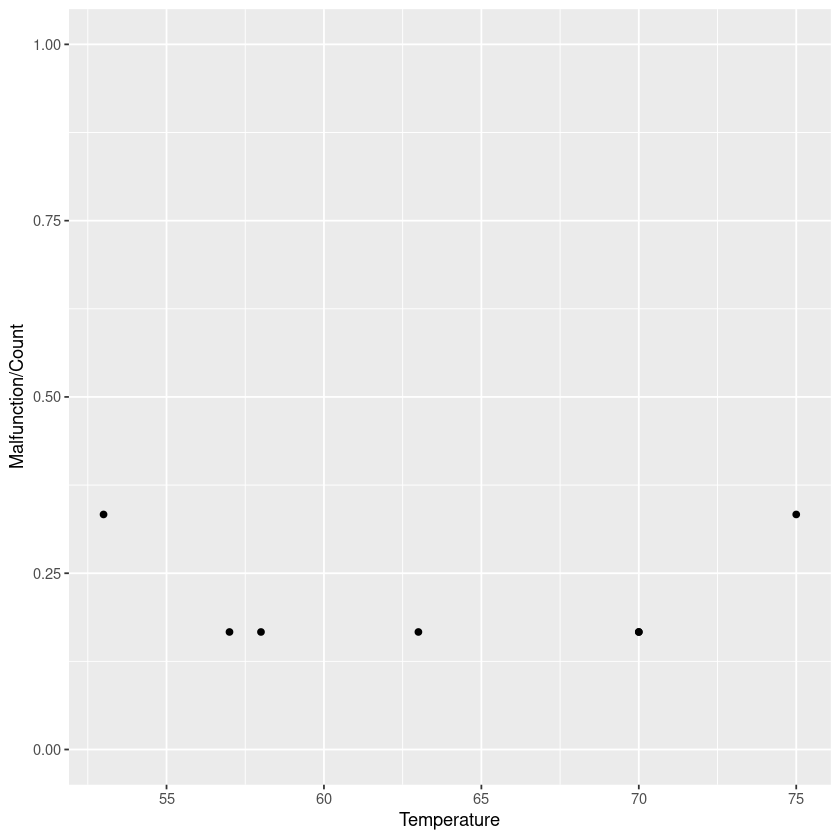

In [39]:
ggplot(malfunctionings, aes(x=Temperature, y=Malfunction/Count)) +
  geom_point() +
  coord_cartesian(ylim=c(0,1))

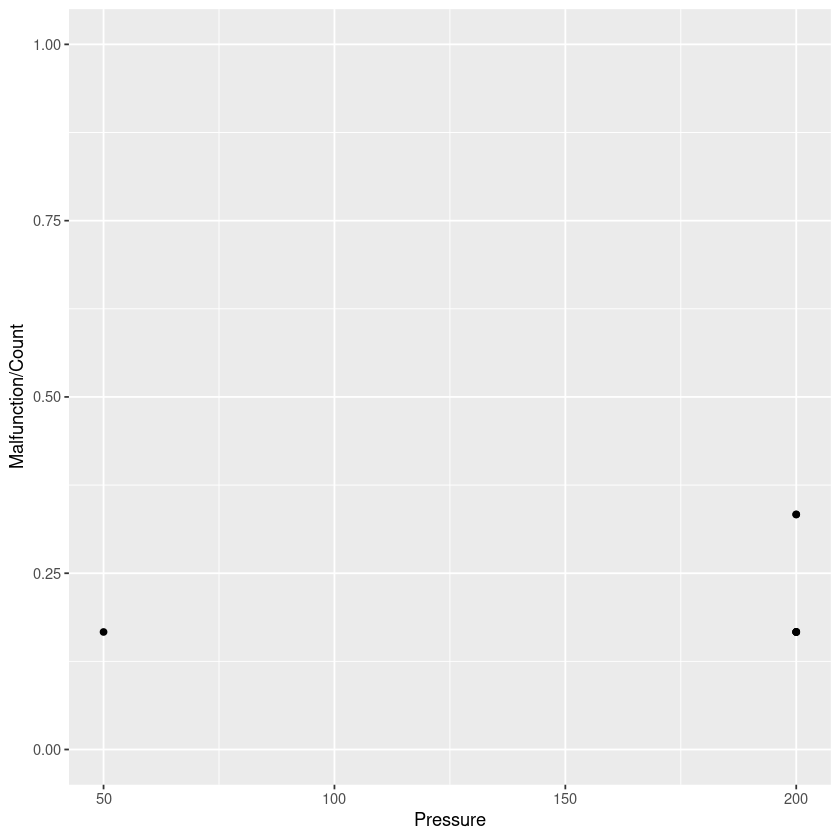

In [40]:
ggplot(malfunctionings, aes(x=Pressure, y=Malfunction/Count)) +
  geom_point() +
  coord_cartesian(ylim=c(0,1))

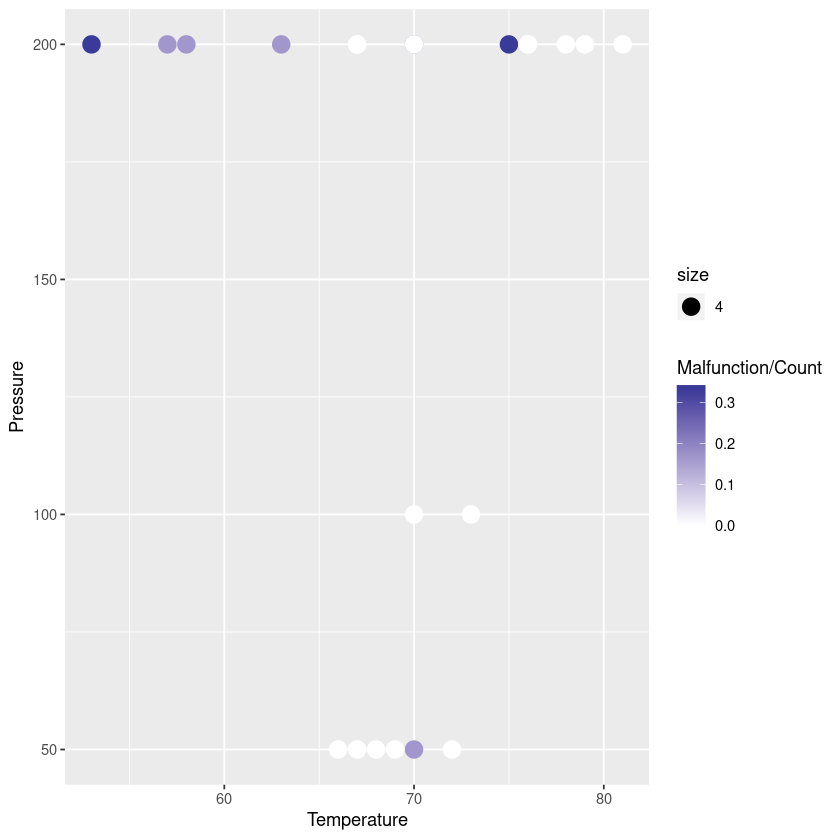

In [64]:
ggplot(data, aes(x=Temperature, y=Pressure)) +
  geom_point(aes(size=4, color=Malfunction/Count)) +
  scale_colour_gradient2()

In [67]:
summary(glm(
    data=malfunctionings,
    Malfunction/Count ~ Temperature,
    weights=Count,
    family=binomial(link='logit')
))


Call:
glm(formula = Malfunction/Count ~ Temperature, family = binomial(link = "logit"), 
    data = malfunctionings, weights = Count)

Deviance Residuals: 
      1        2        3        4        5        6        7  
-0.3015  -0.2836  -0.2919  -0.3015   0.6891   0.6560  -0.2850  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.389528   3.195752  -0.435    0.664
Temperature  0.001416   0.049773   0.028    0.977

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3347  on 6  degrees of freedom
Residual deviance: 1.3339  on 5  degrees of freedom
AIC: 18.894

Number of Fisher Scoring iterations: 4


In [68]:
summary(glm(
    data=malfunctionings,
    Malfunction/Count ~ Pressure,
    weights=Count,
    family=binomial(link='logit')
))


Call:
glm(formula = Malfunction/Count ~ Pressure, family = binomial(link = "logit"), 
    data = malfunctionings, weights = Count)

Deviance Residuals: 
      1        2        3        4        5        6        7  
 0.0000  -0.3385  -0.3385  -0.3385   0.6234   0.6234  -0.3385  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.728330   1.466694  -1.178    0.239
Pressure     0.002378   0.007777   0.306    0.760

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3347  on 6  degrees of freedom
Residual deviance: 1.2356  on 5  degrees of freedom
AIC: 18.796

Number of Fisher Scoring iterations: 4
